# Part 1: Neural Networks with Keras (a-g)
Written by Kelly Nguyen for CMPE 258- Deep Learning Spring 2024


---


### Description
a) Write simple colabs to illustrate various data augmentation and generalization techniques (with A/B tests)

*   l1 l2
*   dropout
*   earlystop
*   montecarlo dropout
*   various initializations and when to use what
*   batch norm
*   custsom dropout, custom regularization





In [3]:
! pip install tensorflow

## L1 and L2 Regularizations
**Purpose**: Demonstrate the impact of L1 and L2 regularizations on model complexity and overfitting.

**Key Components**:
* Implement L1 and L2 regularization using `tf.keras.regularizers.L1` and `tf.keras.regularizers.L2.`
* A/B testing between models with and without regularization.

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# L1 Regularization
model_l1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.0001)),
    Dense(10, activation='softmax')
])

# L2 Regularization
model_l2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(10, activation='softmax')
])

model_l1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_l1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model_l2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4641 - accuracy: 0.9204 - val_loss: 0.3125 - val_accuracy: 0.9515
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2861 - accuracy: 0.9581 - val_loss: 0.2511 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2405 - accuracy: 0.9668 - val_loss: 0.2228 - val_accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2185 - accuracy: 0.9714 - val_loss: 0.2124 - val_accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2029 - accuracy: 0.9736 - val_loss: 0.2033 - val_accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1930 - accuracy: 0.9751 - val_loss: 0.1880 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1854 - accuracy: 0.9765 - val_loss: 0.1945 - val_accuracy:

In [14]:
print("Model with L1 Regularization:")
model_l1.summary()
print("\nModel with L2 Regularization:")
model_l2.summary()

Model with L1 Regularization:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Model with L2 Regularization:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1680 - accuracy: 0.9789 - val_loss: 0.1802 - val_accuracy: 0.9748
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1653 - accuracy: 0.9801 - val_loss: 0.1647 - val_accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1628 - accuracy: 0.9798 - val_loss: 0.1782 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1613 - accuracy: 0.9809 - val_loss: 0.1719 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1583 - accuracy: 0.9805 - val_loss: 0.1740 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1577 - accuracy: 0.9814 - val_loss: 0.1690 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1563 - accuracy: 0.9814 - val_loss: 0.1680 - val_accurac

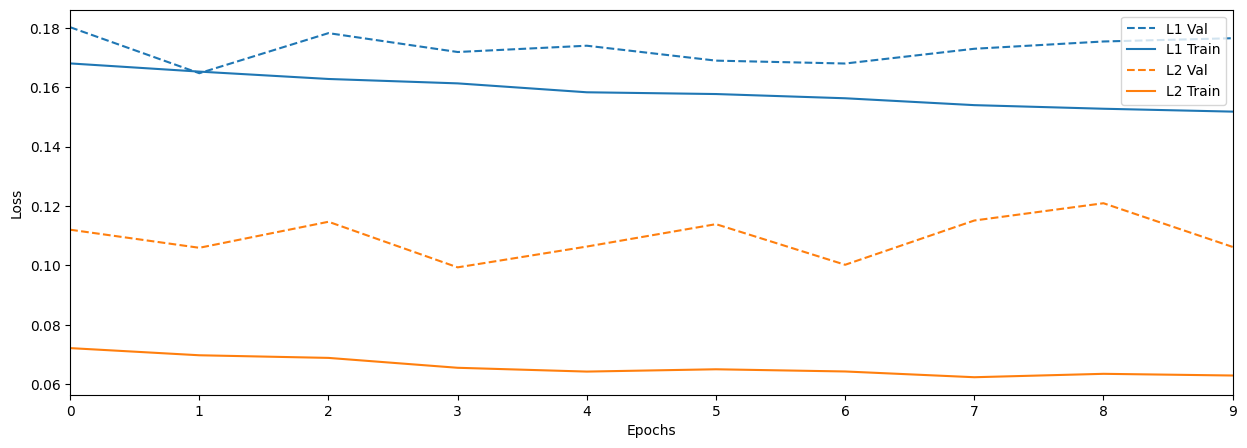

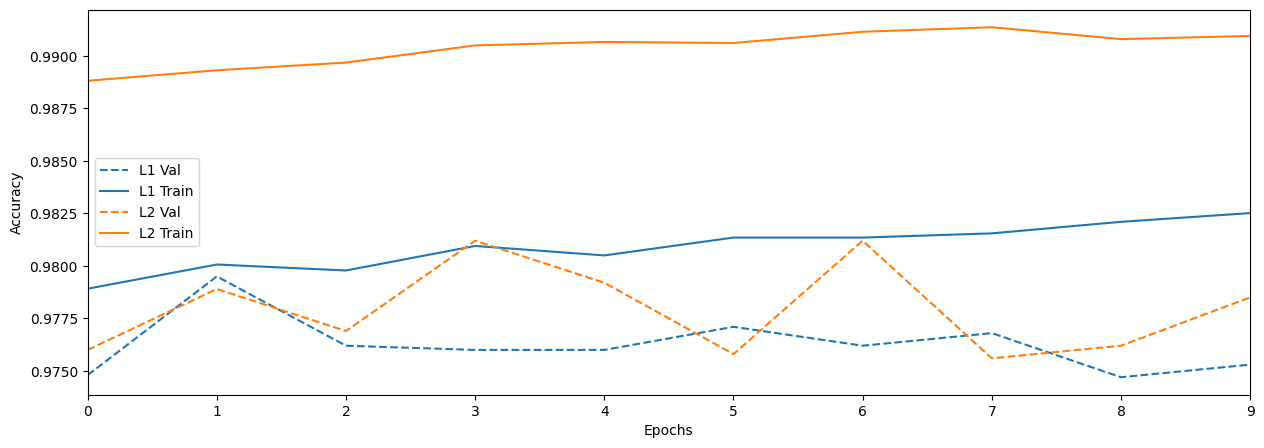

In [15]:
import matplotlib.pyplot as plt

# Fit the models and save the history
history_l1 = model_l1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history_l2 = model_l2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Function to plot history
def plot_history(histories, key='loss'):
    plt.figure(figsize=(15, 5))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Plot loss
plot_history([('L1', history_l1), ('L2', history_l2)], key='loss')
plt.show()

# Plot accuracy
plot_history([('L1', history_l1), ('L2', history_l2)], key='accuracy')
plt.show()


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1520 - accuracy: 0.9822 - val_loss: 0.1711 - val_accuracy: 0.9762
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1499 - accuracy: 0.9825 - val_loss: 0.1676 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1486 - accuracy: 0.9825 - val_loss: 0.1639 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1505 - accuracy: 0.9822 - val_loss: 0.1697 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1481 - accuracy: 0.9830 - val_loss: 0.1757 - val_accuracy: 0.9733
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1463 - accuracy: 0.9833 - val_loss: 0.1871 - val_accuracy: 0.9703
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1460 - accuracy: 0.9832 - val_loss: 0.1754 - val_accuracy:

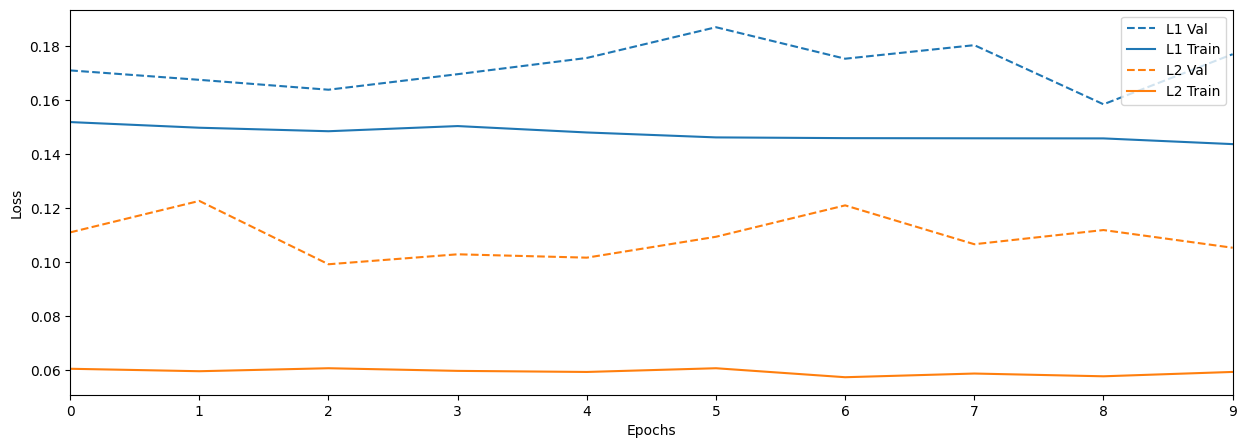

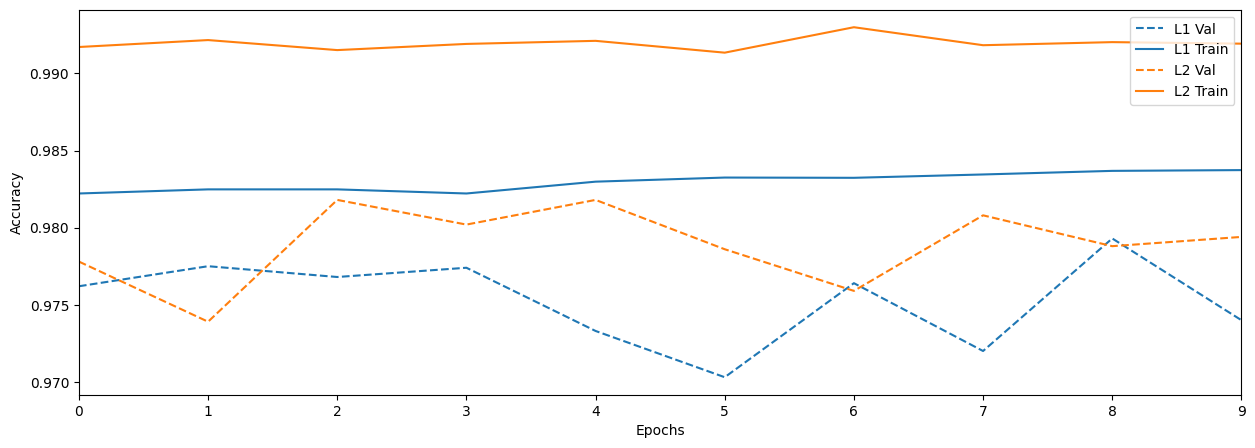

In [16]:
import matplotlib.pyplot as plt

# Fit the models and save the history
history_l1 = model_l1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history_l2 = model_l2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Function to plot history
def plot_history(histories, key='loss'):
    plt.figure(figsize=(15, 5))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Plot loss
plot_history([('L1', history_l1), ('L2', history_l2)], key='loss')
plt.show()

# Plot accuracy
plot_history([('L1', history_l1), ('L2', history_l2)], key='accuracy')
plt.show()


## Dropout

**Purpose**: Show how dropout can be used as a regularization technique to prevent overfitting.

**Key Components**:
* Implement dropout using `tf.keras.layers.Dropout.`
* A/B testing to compare performance with and without dropout.



In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model with Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2960 - accuracy: 0.9137 - val_loss: 0.1378 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9566 - val_loss: 0.1036 - val_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1082 - accuracy: 0.9671 - val_loss: 0.0839 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0877 - accuracy: 0.9730 - val_loss: 0.0833 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0765 - accuracy: 0.9762 - val_loss: 0.0767 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0660 - accuracy: 0.9784 - val_loss: 0.0768 - val_accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9815 - val_loss: 0.0808 - val_accuracy

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3412 - accuracy: 0.9403 - val_loss: 0.2829 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3400 - accuracy: 0.9404 - val_loss: 0.2714 - val_accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3402 - accuracy: 0.9399 - val_loss: 0.2973 - val_accuracy: 0.9558
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3406 - accuracy: 0.9407 - val_loss: 0.2932 - val_accuracy: 0.9562
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.9398 - val_loss: 0.3072 - val_accuracy: 0.9519
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3369 - accuracy: 0.9407 - val_loss: 0.3090 - val_accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3375 - accuracy: 0.9406 - val_loss: 0.2701 - val_accuracy:

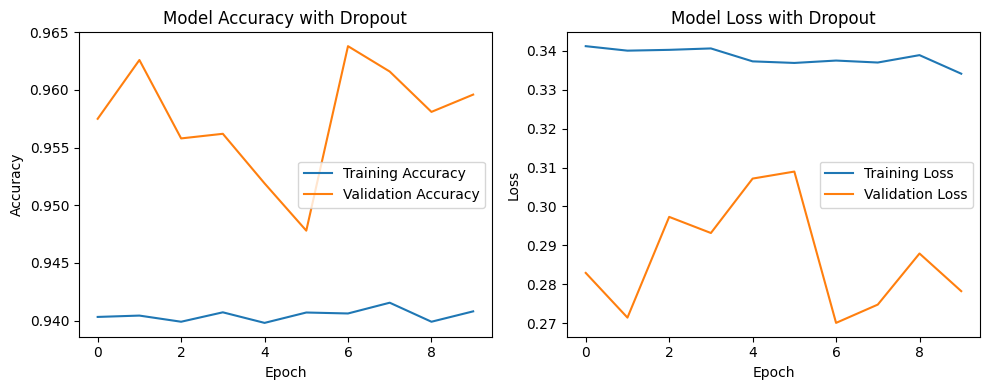

In [17]:
import matplotlib.pyplot as plt

# Fit the model and capture the history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2503 - accuracy: 0.9285 - val_loss: 0.1389 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.0976 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0786 - accuracy: 0.9765 - val_loss: 0.0912 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.0821 - val_accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0747 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0888 - val_accuracy: 0.9736
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0774 - val_accuracy:

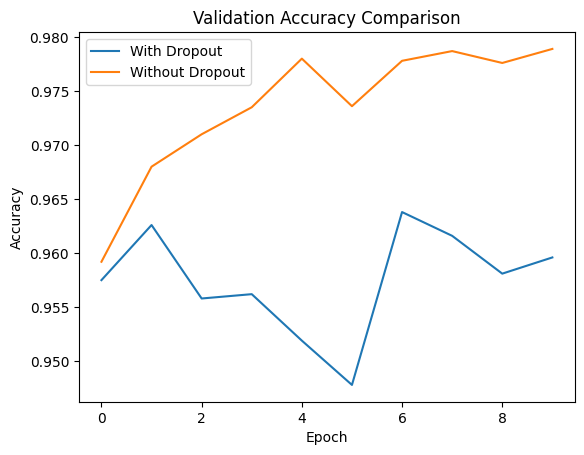

In [18]:
# Model without Dropout
model_no_dropout = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_no_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Compare accuracy
plt.plot(history.history['val_accuracy'], label='With Dropout')
plt.plot(history_no_dropout.history['val_accuracy'], label='Without Dropout')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Early Stopping
**Purpose**: Implement early stopping to prevent overfitting by stopping training when a monitored metric has stopped improving.

**Key Components**:
* Use `tf.keras.callbacks.EarlyStopping.`
* Discuss when to use it and how to set the patience parameter.

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2584 - accuracy: 0.9272 - val_loss: 0.1324 - val_accuracy: 0.9622
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1139 - accuracy: 0.9660 - val_loss: 0.1070 - val_accuracy: 0.9677
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0777 - accuracy: 0.9764 - val_loss: 0.0810 - val_accuracy: 0.9747
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0594 - accuracy: 0.9822 - val_loss: 0.0776 - val_accuracy: 0.9762
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0777 - val_accuracy: 0.9757
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0768 - val_accuracy: 0.9780
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0777 - val_accuracy:

In [21]:
# Fitting the model to capture history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3365 - accuracy: 0.9409 - val_loss: 0.3201 - val_accuracy: 0.9455
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3375 - accuracy: 0.9412 - val_loss: 0.2799 - val_accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3392 - accuracy: 0.9392 - val_loss: 0.2812 - val_accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3376 - accuracy: 0.9400 - val_loss: 0.2736 - val_accuracy: 0.9603
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3362 - accuracy: 0.9396 - val_loss: 0.2861 - val_accuracy: 0.9566
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3398 - accuracy: 0.9389 - val_loss: 0.2687 - val_accuracy: 0.9622
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3338 - accuracy: 0.9416 - val_loss: 0.2679 - val_accuracy:

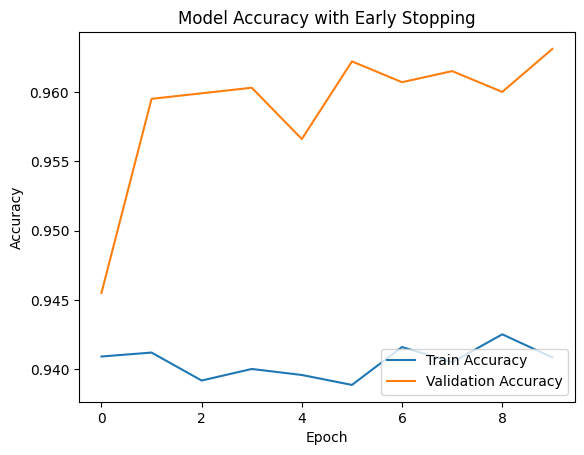

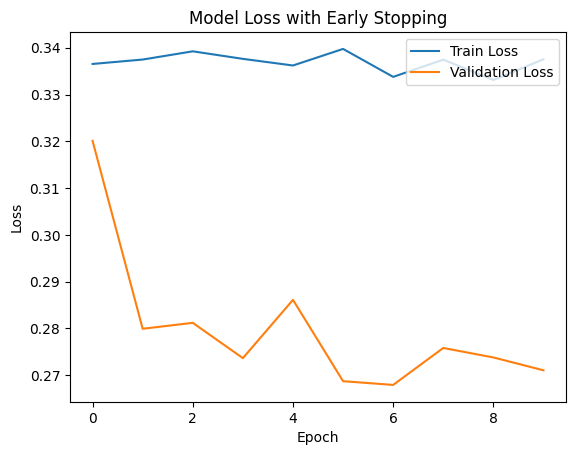

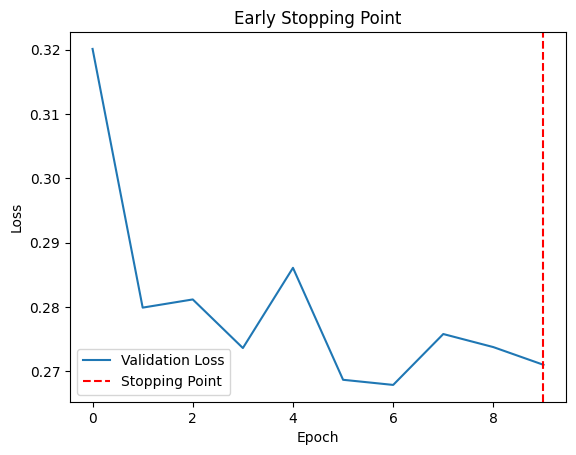

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Highlight the point of early stopping
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Early Stopping Point')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.axvline(x=len(history.history['loss']) - 1, color='r', linestyle='--', label='Stopping Point')
plt.legend()
plt.show()


## Monte Carlo Dropout
**Purpose**: Explore how Monte Carlo Dropout can be used to improve the reliability of uncertainty estimates in neural networks.

**Key Components**:
* Implement Monte Carlo Dropout by using dropout at inference time.
* Compare with standard dropout.

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model with Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Monte Carlo predictions
import numpy as np

def monte_carlo_predictions(model, x, num_samples=100):
    predictions = [model(x, training=True) for _ in range(num_samples)]
    return np.mean(predictions, axis=0)

mc_predictions = monte_carlo_predictions(model, x_test[:1])


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3039 - accuracy: 0.9119 - val_loss: 0.1396 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1473 - accuracy: 0.9572 - val_loss: 0.1009 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1110 - accuracy: 0.9663 - val_loss: 0.0872 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.9725 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9762 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0657 - accuracy: 0.9787 - val_loss: 0.0714 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0732 - val_accuracy

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3559 - accuracy: 0.9377 - val_loss: 0.2871 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3494 - accuracy: 0.9386 - val_loss: 0.2975 - val_accuracy: 0.9548
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3511 - accuracy: 0.9381 - val_loss: 0.2986 - val_accuracy: 0.9539
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3504 - accuracy: 0.9384 - val_loss: 0.2867 - val_accuracy: 0.9572
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3436 - accuracy: 0.9400 - val_loss: 0.2911 - val_accuracy: 0.9577
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3477 - accuracy: 0.9392 - val_loss: 0.2883 - val_accuracy: 0.9603
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3447 - accuracy: 0.9402 - val_loss: 0.2996 - val_accurac

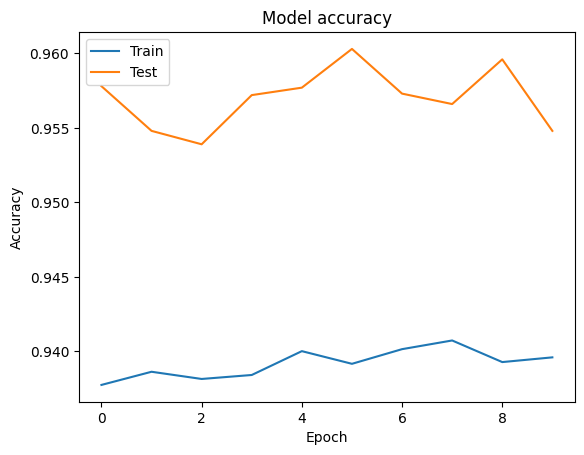

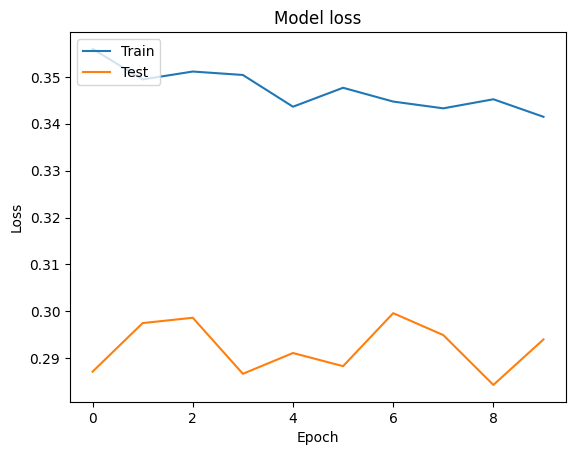

In [13]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


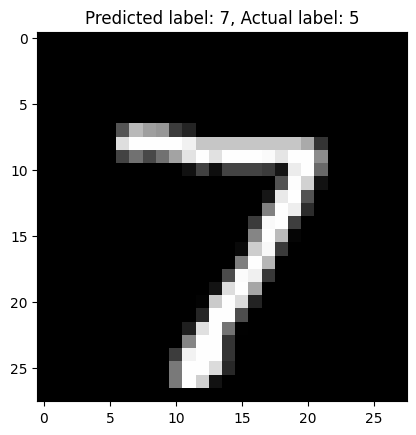

In [12]:
import matplotlib.pyplot as plt

# Get a test image and its label
test_image = x_test[0]
test_label = y_train[0]

# Predict using Monte Carlo dropout
mc_prediction = monte_carlo_predictions(model, np.expand_dims(test_image, axis=0))

# Plot the image
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted label: {np.argmax(mc_prediction)}, Actual label: {test_label}')
plt.show()


## Various Initializations
**Purpose**: Explore different weight initializations and their impacts on model convergence and performance.

**Key Components**:
* Use various initializers like `tf.keras.initializers.GlorotUniform`, `tf.keras.initializers.HeNormal.`
* Discuss scenarios suitable for each type of initializer.

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal, GlorotUniform

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# He Normal Initialization
model_he = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_initializer=HeNormal()),
    Dense(10, activation='softmax')
])

# Glorot Uniform Initialization
model_glorot = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(10, activation='softmax')
])

model_he.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_glorot.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_he.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model_glorot.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2607 - accuracy: 0.9255 - val_loss: 0.1327 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1134 - accuracy: 0.9664 - val_loss: 0.1113 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0794 - accuracy: 0.9765 - val_loss: 0.0876 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.0815 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0764 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0830 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0846 - val_accurac

In [23]:
history_he = model_he.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history_glorot = model_glorot.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0900 - val_accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0854 - val_accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0910 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.1023 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.1121 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.1031 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.1012 - val_accuracy:

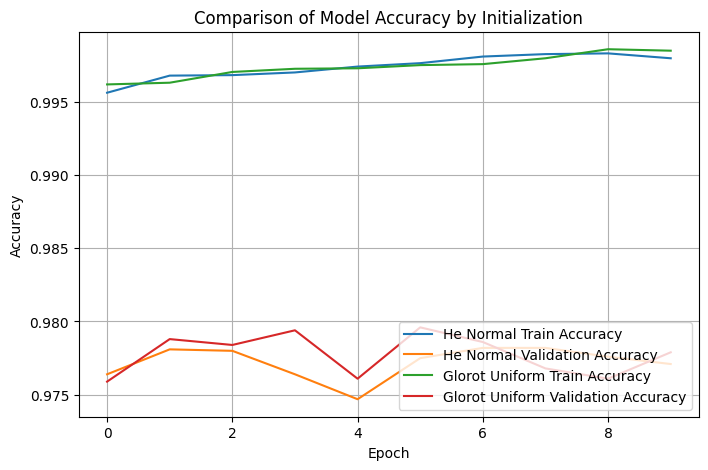

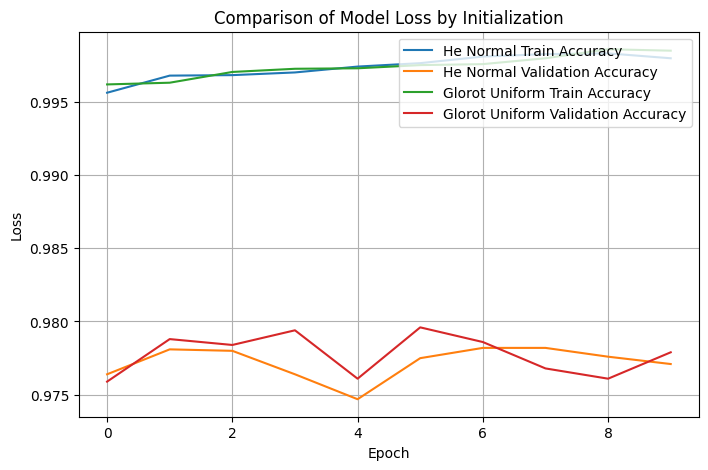

In [24]:
import matplotlib.pyplot as plt

# Plotting function
def plot_comparison(histories, title, ylabel, legend_loc='lower right'):
    plt.figure(figsize=(8, 5))
    for name, history in histories:
        plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)
    plt.grid(True)
    plt.show()

# Accuracy comparison
plot_comparison(
    [('He Normal', history_he), ('Glorot Uniform', history_glorot)],
    'Comparison of Model Accuracy by Initialization',
    'Accuracy'
)

# Loss comparison
plot_comparison(
    [('He Normal', history_he), ('Glorot Uniform', history_glorot)],
    'Comparison of Model Loss by Initialization',
    'Loss',
    'upper right'
)


## Batch Normalization
**Purpose**: Demonstrate how batch normalization can accelerate training and improve performance.

**Key Components**:
* Implement batch normalization using tf.keras.layers.BatchNormalization.
* A/B testing to observe benefits over non-normalized models.

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model with Batch Normalization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2353 - accuracy: 0.9309 - val_loss: 0.1248 - val_accuracy: 0.9623
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1143 - accuracy: 0.9657 - val_loss: 0.0991 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0859 - accuracy: 0.9732 - val_loss: 0.0831 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0700 - accuracy: 0.9780 - val_loss: 0.0828 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.0764 - val_accurac

In [25]:
# Model without Batch Normalization
model_no_bn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_no_bn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2617 - accuracy: 0.9254 - val_loss: 0.1496 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1177 - accuracy: 0.9660 - val_loss: 0.1028 - val_accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.0855 - val_accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0830 - val_accuracy: 0.9741
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0781 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0764 - val_accuracy:

In [26]:
history_bn = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3358 - accuracy: 0.9404 - val_loss: 0.2956 - val_accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3359 - accuracy: 0.9407 - val_loss: 0.2752 - val_accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3346 - accuracy: 0.9413 - val_loss: 0.2652 - val_accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3352 - accuracy: 0.9412 - val_loss: 0.2805 - val_accuracy: 0.9569
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3360 - accuracy: 0.9410 - val_loss: 0.2604 - val_accuracy: 0.9634
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3365 - accuracy: 0.9402 - val_loss: 0.2671 - val_accuracy: 0.9620
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.9392 - val_loss: 0.2721 - val_accuracy:

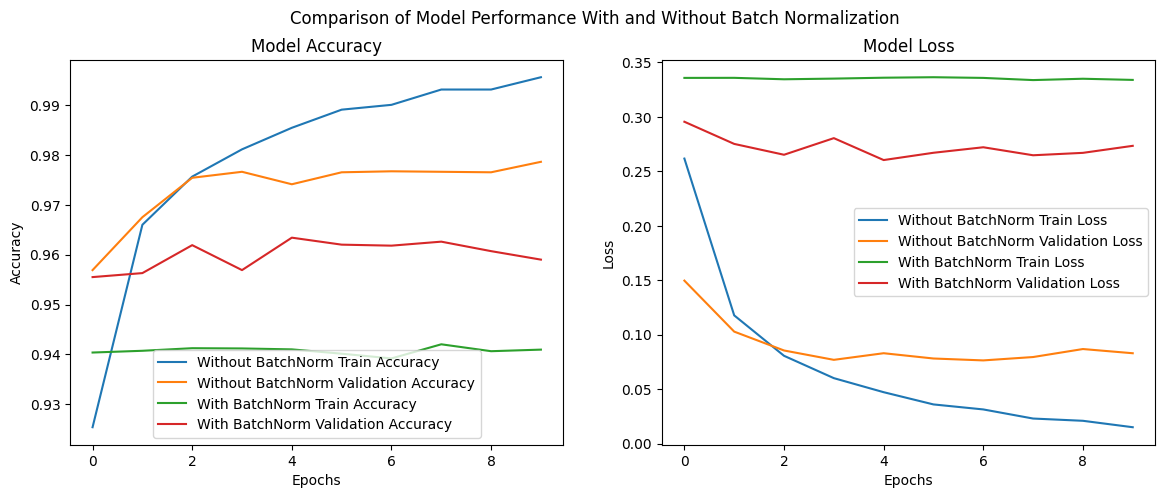

In [27]:
import matplotlib.pyplot as plt

# Function to plot the comparison of training histories
def plot_metrics(histories, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    for i, metric in enumerate(['accuracy', 'loss']):
        for name, history in histories:
            axes[i].plot(history.history[metric], label=f'{name} Train {metric.capitalize()}')
            axes[i].plot(history.history[f'val_{metric}'], label=f'{name} Validation {metric.capitalize()}')
        axes[i].set_title(f'Model {metric.capitalize()}')
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel(metric.capitalize())
        axes[i].legend()

    plt.suptitle(title)
    plt.show()

# Compare the models
plot_metrics(
    [('Without BatchNorm', history_no_bn), ('With BatchNorm', history_bn)],
    'Comparison of Model Performance With and Without Batch Normalization'
)

1/1 [==============================] - 0s 94ms/step


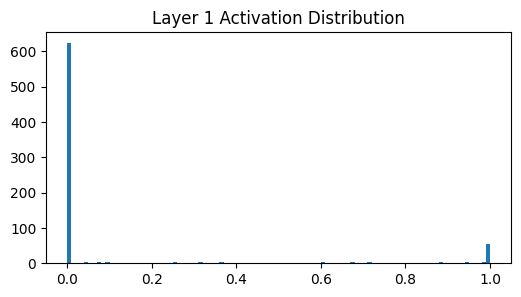

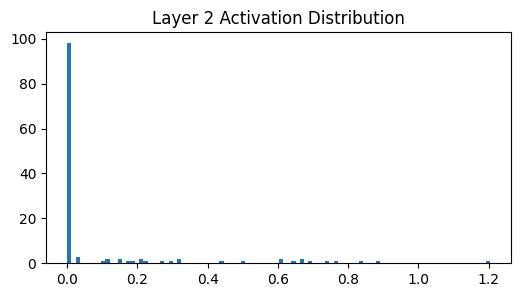

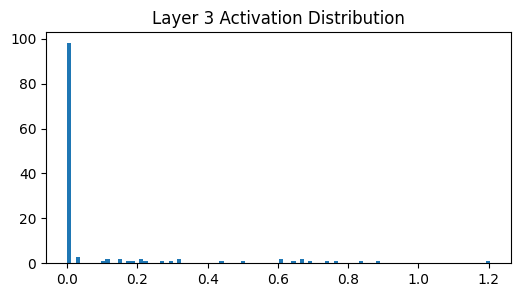

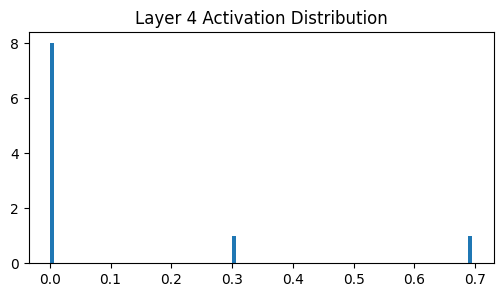

In [28]:
model_intermediate = tf.keras.Model(inputs=model.inputs,
                                    outputs=[layer.output for layer in model.layers])
activations = model_intermediate.predict(x_train[:1])

# Plot activation distributions
for i, activation in enumerate(activations):
    plt.figure(figsize=(6, 3))
    plt.hist(activation.flatten(), bins=100)
    plt.title(f'Layer {i+1} Activation Distribution')
    plt.show()


##  Custom Dropout and Custom Regularization
**Purpose**: Explore custom implementations of dropout and other regularization techniques.

**Key Components**:
* Implement a custom dropout layer using TensorFlow functionalities.
* Create a custom regularization function and apply it to a model.

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

class CustomDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

def custom_l2_regularizer(weight_matrix):
    return 0.01 * tf.reduce_sum(tf.square(weight_matrix))

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model with Custom Dropout and Custom Regularization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=custom_l2_regularizer),
    CustomDropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6600 - accuracy: 0.8864 - val_loss: 0.4323 - val_accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4425 - accuracy: 0.9182 - val_loss: 0.3857 - val_accuracy: 0.9393
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4102 - accuracy: 0.9248 - val_loss: 0.3794 - val_accuracy: 0.9374
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3929 - accuracy: 0.9300 - val_loss: 0.3470 - val_accuracy: 0.9425
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3809 - accuracy: 0.9322 - val_loss: 0.3161 - val_accuracy: 0.9527
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3704 - accuracy: 0.9341 - val_loss: 0.3278 - val_accuracy: 0.9470
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3651 - accuracy: 0.9342 - val_loss: 0.3135 - val_accuracy

In [29]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Standard model for comparison
model_standard = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_standard.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_standard = model_standard.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6550 - accuracy: 0.8881 - val_loss: 0.4085 - val_accuracy: 0.9310
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4414 - accuracy: 0.9183 - val_loss: 0.3757 - val_accuracy: 0.9394
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4051 - accuracy: 0.9263 - val_loss: 0.3364 - val_accuracy: 0.9441
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3869 - accuracy: 0.9313 - val_loss: 0.3475 - val_accuracy: 0.9430
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3778 - accuracy: 0.9321 - val_loss: 0.3231 - val_accuracy: 0.9491
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3678 - accuracy: 0.9342 - val_loss: 0.3214 - val_accuracy: 0.9464
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3640 - accuracy: 0.9352 - val_loss: 0.3282 - val_accuracy:

In [30]:
history_custom = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.9400 - val_loss: 0.2855 - val_accuracy: 0.9588
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3380 - accuracy: 0.9403 - val_loss: 0.2838 - val_accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3356 - accuracy: 0.9409 - val_loss: 0.2804 - val_accuracy: 0.9574
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3313 - accuracy: 0.9413 - val_loss: 0.2822 - val_accuracy: 0.9592
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3316 - accuracy: 0.9413 - val_loss: 0.2654 - val_accuracy: 0.9620
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3369 - accuracy: 0.9412 - val_loss: 0.2797 - val_accuracy: 0.9597
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3347 - accuracy: 0.9409 - val_loss: 0.2990 - val_accuracy

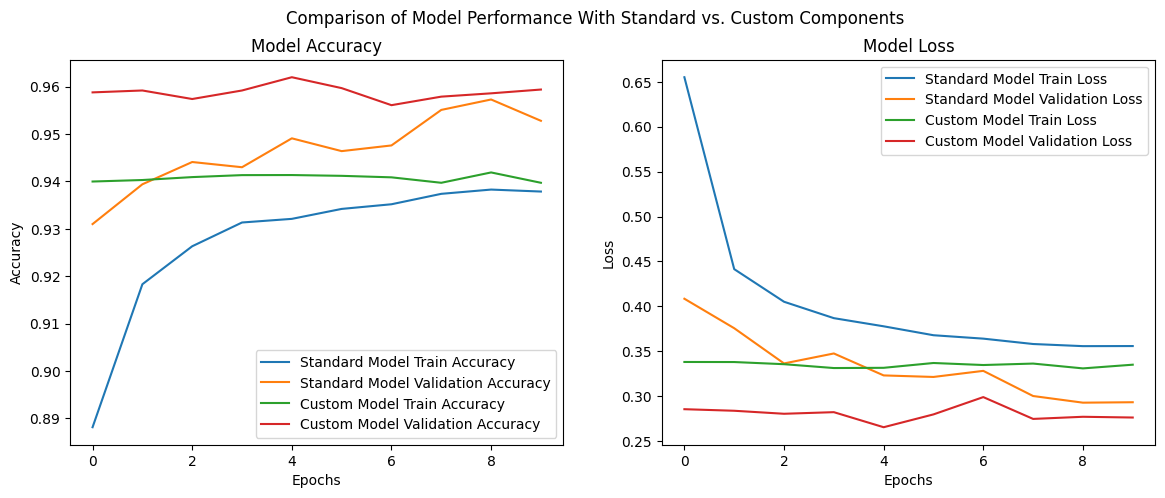

In [31]:
import matplotlib.pyplot as plt

# Function to plot the comparison of training histories
def plot_metrics(histories, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    for i, metric in enumerate(['accuracy', 'loss']):
        for name, history in histories:
            axes[i].plot(history.history[metric], label=f'{name} Train {metric.capitalize()}')
            axes[i].plot(history.history[f'val_{metric}'], label=f'{name} Validation {metric.capitalize()}')
        axes[i].set_title(f'Model {metric.capitalize()}')
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel(metric.capitalize())
        axes[i].legend()

    plt.suptitle(title)
    plt.show()

# Compare the models
plot_metrics(
    [('Standard Model', history_standard), ('Custom Model', history_custom)],
    'Comparison of Model Performance With Standard vs. Custom Components'
)


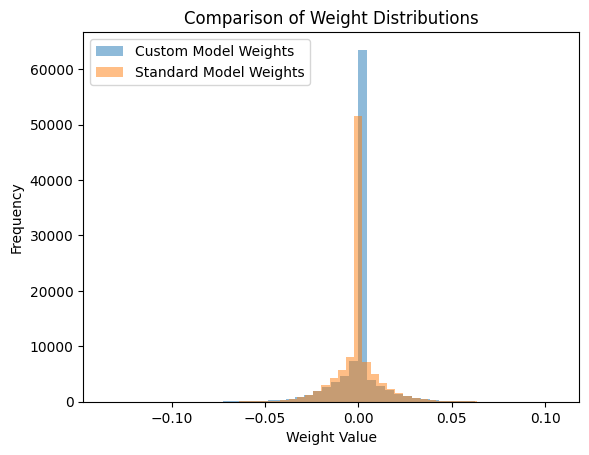

In [32]:
# Check weights distribution in both models
weights_custom = model.layers[1].get_weights()[0]  # Get weights from the Dense layer
weights_standard = model_standard.layers[1].get_weights()[0]

plt.hist(weights_custom.flatten(), bins=50, alpha=0.5, label='Custom Model Weights')
plt.hist(weights_standard.flatten(), bins=50, alpha=0.5, label='Standard Model Weights')
plt.title('Comparison of Weight Distributions')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
